In [ ]:
!pip install qiskit
!pip install pylatexenc

In [3]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

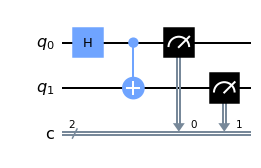

In [4]:
qc = QuantumCircuit(2, 2)
qc.h(0)  # add H gate
qc.cx(0, 1)  # added CNOT gate
qc.measure(range(2), range(2))  # Measure
qc.draw(output='mpl')


{'00': 501, '11': 523}


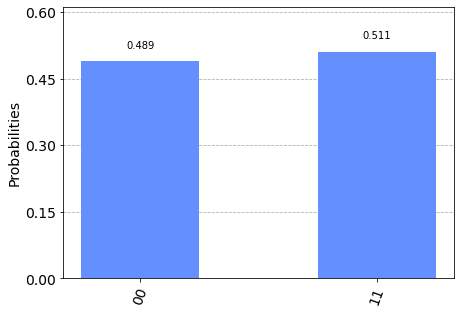

In [5]:
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

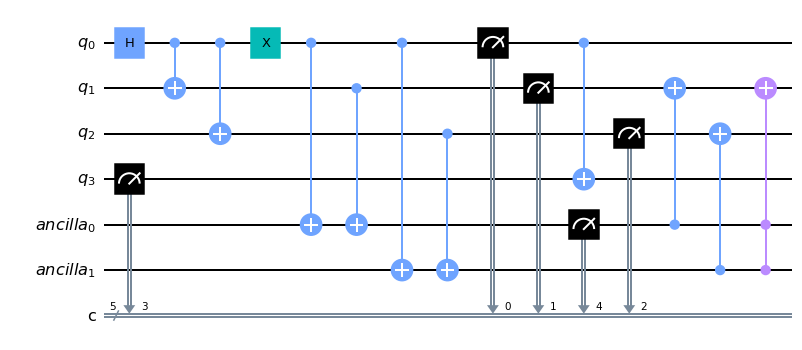

In [45]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

qr = QuantumRegister(4, 'q')
anc = QuantumRegister(2, 'ancilla')
cr = ClassicalRegister(5, 'c')

qc = QuantumCircuit(qr, anc, cr)

qc.h(qr[0])              # original part from the first circuit q0
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[2])

qc.x(qr[0]) # error circuit
#or
#qc.x(qr[1]) # error circuit
#or
#qc.x(qr[2]) # error circuit


qc.cx(qr[0], anc[0]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit
qc.cx(qr[1], anc[0]) # error correction: ancillary qubit flipped again conditionaly on the value of second qubit
qc.cx(qr[0], anc[1]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit
qc.cx(qr[2], anc[1]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit

qc.measure(range(5), range(5))  # Measure

qc.cx(anc[0], qr[1]) 
qc.cx(anc[1], qr[2]) 
#qc.mcx([anc[0], anc[1]], [qr[0], qr[1], qr[2]])
#qc.mcx([3, 4], [0, 1, 2])

qc.mcx(list(range(4, 6)), 1)

range(3)

#qc.mcx(list(range(3)), 4)
#qc.mcx(list(range(3)), 4)


qc.cx(qr[0], qr[3])      # original part from the first circuit (qubit q1)

qc.draw(output='mpl')



{'10001': 535, '10110': 489}


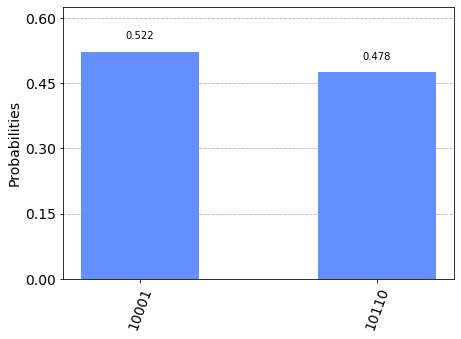

In [21]:

backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


[2]